<a href="https://colab.research.google.com/github/rajeshkpandey/AWESOME-FER/blob/master/Epidemics_ABM_python_latest_viral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

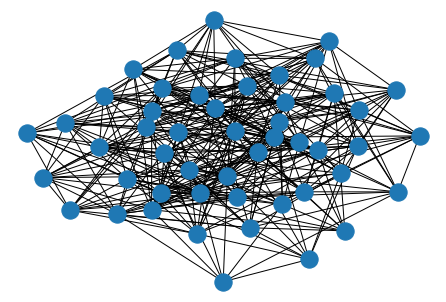

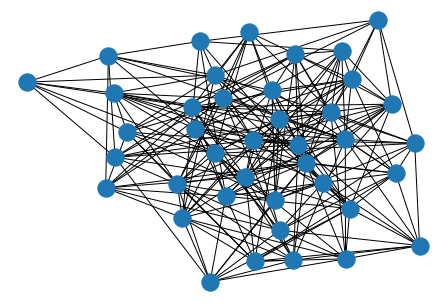

In [1]:
#Erdos-Renyi Graph in Networkx
import numpy as np
from statistics import mean
import random
import copy
from networkx import nx
import matplotlib.pyplot as plt

N = 50  # 50 Indian Cities
K = 10000  # 10000 Agents(people under observation on SIR modeling)
#M = 30  # 30 Edges
NN = 40 # 40 nodes (contact places) of Cities


#Graph = nx.gnm_random_graph(N, M)

P = .3      #Probabibilty for Node Connection in random graph
PP = .3
Graph = nx.erdos_renyi_graph(N,P) # Use Networkx to generate a random graph of N nodes being connected with probability P.
GraphN = nx.erdos_renyi_graph(NN,PP)


nx.draw(Graph)
plt.show()
nx.draw(GraphN)
plt.show()

In [2]:
A = nx.adjacency_matrix(Graph)
Adjacency_matrix = A.todense()
AN = nx.adjacency_matrix(GraphN)
Adjacency_matrixN = AN.todense()
print(Adjacency_matrix)
print(Adjacency_matrixN)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]
[[0 0 1 ... 1 0 1]
 [0 0 1 ... 1 0 0]
 [1 1 0 ... 0 1 0]
 ...
 [1 1 0 ... 0 0 1]
 [0 0 1 ... 0 0 0]
 [1 0 0 ... 1 0 0]]


In [3]:
#Empty Node Dictionary [ A Dictionary consisting list of agent states on Graph Nodes]
Node = {}
print(Node)
for i in range(N):
  for j in range(NN):
    Node[i*NN+j] = list()
#print(Node)
print(len(Node))


{}
2000


In [4]:
#Adding Viral_Index Randomly
for i in range(N):
  for j in range(NN):
    Viral_load=0
    Node[i*NN+j].append({'Viral_load' : Viral_load})
    Node[i*NN+j].append({'S' : 0})
    Node[i*NN+j].append({'I' : 0})
    Node[i*NN+j].append({'R' : 0})
#print(Node)
print(len(Node))


2000


In [5]:
#Initailizing randomly infection state [0 shows Susceptible, 1 shows Infected, and 2 shows Recovered]
Agent = {}
for k in range(K):
  Agent[k] = list() 
for k in range(K):
  Rand_node=random.randint(0,N-1)
  Neighbors = list(Graph.neighbors(Rand_node))
  Rand_nodeN=random.randint(0,NN-1)
  First_nodeN = random.randint(0,NN-1)
  Second_nodeN = random.randint(0,NN-1)
  Rand_state=random.choices([0,1],weights=(98,2),k=1)[0]
  Rand_neighbors = list(GraphN.neighbors(Rand_nodeN))
  Rand_neighbors1 = list(GraphN.neighbors(First_nodeN))
  Rand_neighbors2 = list(GraphN.neighbors(Second_nodeN))
  if len(Rand_neighbors) > 0:
    Rand_nodeN1=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN1)
  else:
    Rand_nodeN1=Rand_nodeN
  
  if len(Rand_neighbors) > 0:
    Rand_nodeN2=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN2)
    if Rand_nodeN2 not in list(GraphN.neighbors(Rand_nodeN1)):
      Rand_nodeN2=Rand_nodeN1
  else:
    Rand_nodeN2=Rand_nodeN1
  
  if Rand_state == 0:
    Node[Rand_node*NN+Rand_nodeN][1]['S']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
    Agent[k].append({'State' : Rand_state})
  elif Rand_state == 1:
    Node[Rand_node*NN+Rand_nodeN][2]['I']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state, 'C' : 0})
    Agent[k].append({'State' : Rand_state, 'C' : 0 })
  else:
    Node[Rand_node*NN+Rand_nodeN][3]['R']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
    Agent[k].append({'State' : Rand_state})

  Agent[k].append({'Home_node' : Rand_node})
  Agent[k].append({'Home_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
  
  if len(Neighbors) > 0:
    First_node = random.choice(Neighbors)
    Neighbors.remove(First_node)
  else:
    First_node = Rand_node
  if len(Neighbors) > 0:
    Second_node = random.choice(Neighbors)
  else:
    Second_node = Rand_node

  if len(Rand_neighbors1) > 0:
    First_nodeN1=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN1)
  else:
    First_nodeN1=First_nodeN
  
  if len(Rand_neighbors1) > 0:
    First_nodeN2=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN2)
    if First_nodeN2 not in list(GraphN.neighbors(First_nodeN1)):
      First_nodeN2=First_nodeN1
  else:
    First_nodeN2=First_nodeN1

  if len(Rand_neighbors2) > 0:
    Second_nodeN1=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN1)
  else:
    Second_nodeN1=Second_nodeN
  
  if len(Rand_neighbors2) > 0:
    Second_nodeN2=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN2)
    if Second_nodeN2 not in list(GraphN.neighbors(Second_nodeN1)):
      Second_nodeN2=Second_nodeN1
  else:
    Second_nodeN2=Second_nodeN1

  Agent[k].append({'First_node' : First_node})
  Agent[k].append({'First_nodeN' : [First_nodeN, First_nodeN1, First_nodeN2]})
  Agent[k].append({'Second_node' : Second_node})
  Agent[k].append({'Second_nodeN' : [Second_nodeN, Second_nodeN1, Second_nodeN2]})
  Agent[k].append({'Current_node' : Rand_node})
  Agent[k].append({'Current_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
#print(Node)
#print(Agent)

In [6]:
print(len(Graph.nodes))
print(len(GraphN.nodes))

50
40


In [7]:
#Random Walk Implementation
def random_walk(Graph=Graph, GraphN=GraphN, Node=Node, Agent=Agent, num_walks=1, num_steps=1):
    walks = list()
    Node_next = {}
    Agent_next = {}
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j] = list() 
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j].append({'Viral_load' : copy.deepcopy(Node[i*len(GraphN.nodes)+j][0]['Viral_load']*.5)})
        Node_next[i*len(GraphN.nodes)+j].append({'S' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'I' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'R' : 0})
    for i in range(len(Agent)):
      Agent_next[i] = list()
    Agent_next = copy.deepcopy(Agent)
    count_nomove=0
    count_move_first=0
    count_move_second=0
    count_stay_home=0
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        for agent in list(range(4,len(Node[i*len(GraphN.nodes)+j]))):
          a_id = list(Node[i*len(GraphN.nodes)+j][agent].keys())[0]
          #print(a_id)
          #print(Agent[a_id])
          for walk in range(num_walks):
              curr_walk = [i*len(GraphN.nodes)+j]
              cur = i*len(GraphN.nodes)+j
              for step in range(num_steps):
                  neighbors = []
                  neighbors.append(Agent_next[a_id][1]['Home_node'])
                  neighbors.append(Agent_next[a_id][3]['First_node'])
                  neighbors.append(Agent_next[a_id][5]['Second_node'])

                  if len(neighbors) > 0:  
                      I1=(Node[Agent_next[a_id][4]['First_nodeN'][0]][2]['I'] +  Node[Agent_next[a_id][4]['First_nodeN'][1]][2]['I'] + Node[Agent_next[a_id][4]['First_nodeN'][2]][2]['I'])
                      I2=(Node[Agent_next[a_id][6]['Second_nodeN'][0]][2]['I'] +  Node[Agent_next[a_id][6]['Second_nodeN'][1]][2]['I'] + Node[Agent_next[a_id][6]['Second_nodeN'][2]][2]['I'])
                      IH=(Node[Agent_next[a_id][2]['Home_nodeN'][0]][2]['I'] +  Node[Agent_next[a_id][2]['Home_nodeN'][1]][2]['I'] + Node[Agent_next[a_id][2]['Home_nodeN'][2]][2]['I'])
                      V1 = (Node[Agent_next[a_id][4]['First_nodeN'][0]][0]['Viral_load'] + Node[Agent_next[a_id][4]['First_nodeN'][1]][0]['Viral_load'] + Node[Agent_next[a_id][4]['First_nodeN'][2]][0]['Viral_load'])
                      V2 = (Node[Agent_next[a_id][6]['Second_nodeN'][0]][0]['Viral_load'] + Node[Agent_next[a_id][6]['Second_nodeN'][1]][0]['Viral_load'] + Node[Agent_next[a_id][6]['Second_nodeN'][2]][0]['Viral_load'])
                      VH = (Node[Agent_next[a_id][2]['Home_nodeN'][0]][0]['Viral_load'] + Node[Agent_next[a_id][2]['Home_nodeN'][1]][0]['Viral_load'] + Node[Agent_next[a_id][2]['Home_nodeN'][2]][0]['Viral_load'])
                      P1 = I1/(I1**2 + .01) + V1/(V1**2+.01)
                      P2 = I2/(I2**2 + .01) + V2/(V2**2+.01)
                      PH = IH/(IH**2 + .01) + VH/(VH**2+.01)
                      if max(P1,P2,PH) == PH:
                        PH = 3*PH
                        P1 = P1/3
                        P2 = P2/3
                      elif max(P1,P2,PH) == P1:
                        P1 = P1
                        P2 = P2
                        PH = 3*PH
                      else:
                        P1 = P1
                        P2 = P2
                        PH = 3*PH
                      P = P1 + P2 + PH                      
                      if P == 0:
                        PNN1 = 1
                        PNN2 = 0
                        PNN3 = 0
                      else:
                        PNN1 = PH/P 
                        PNN2 = P1/P
                        PNN3 = P2/P 
                      #next = random.choices(neighbors,weights=(PNN1,PNN2,PNN3), k=1)[0] 
                      next = random.choices(neighbors,weights=(.96,.02,.02), k=1)[0]
                      if next == Agent_next[a_id][7]['Current_node']:
                        #print("no movement")
                        count_nomove+=1

                      else:
                        if next == Agent_next[a_id][3]['First_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][3]['First_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][4]['First_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][4]['First_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][4]['First_nodeN'][2]
                          count_move_first+=1
                        elif next == Agent_next[a_id][5]['Second_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][5]['Second_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][6]['Second_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][6]['Second_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][6]['Second_nodeN'][2]
                          count_move_second+=1
                        elif next == Agent_next[a_id][1]['Home_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][1]['Home_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][2]['Home_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][2]['Home_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][2]['Home_nodeN'][2]
                          count_stay_home+=1
                      I2 = Node[Agent_next[a_id][8]['Current_nodeN'][1]][2]['I']
                      I3 = Node[Agent_next[a_id][8]['Current_nodeN'][2]][2]['I']
                      I1 = Node[Agent_next[a_id][8]['Current_nodeN'][0]][2]['I']
                      V2 = Node[Agent_next[a_id][8]['Current_nodeN'][1]][0]['Viral_load']
                      V3 = Node[Agent_next[a_id][8]['Current_nodeN'][2]][0]['Viral_load']
                      V1 = Node[Agent_next[a_id][8]['Current_nodeN'][0]][0]['Viral_load']
                      P2 = I2/(I2**2 + .01) + V2/(V2**2+.01)
                      P3 = I3/(I3**2 + .01) + V3/(V3**2+.01)
                      P1 = I1/(I1**2 + .01) + V1/(V1**2+.01)
                      if max(P1,P2,P3) == P1:
                        P1 = P1
                        P2 = P2/3
                        P3 = P3/3
                      elif max(P1,P2,P3) == P2:
                        P1 = P1
                        P2 = P2
                        P3 = P1/2
                      else:
                        P1 = P1
                        P2 = P2/2
                        P3 = P3
                      P = P1+P2+P3
                      if P == 0:
                        PNN1 = 1
                        PNN2 = 0
                        PNN3 = 0
                      else:
                        PNN1=P1/P
                        PNN2=P2/P
                        PNN3=P3/P
                       
                      nextn = random.choices(Agent_next[a_id][8]['Current_nodeN'],weights=(PNN1,PNN2,PNN3),k=1)[0]
                      if nextn == Agent_next[a_id][8]['Current_nodeN'][1]:
                        Agent_next[a_id][8]['Current_nodeN'][1],Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][8]['Current_nodeN'][0],Agent_next[a_id][8]['Current_nodeN'][1]
                      elif nextn == Agent_next[a_id][8]['Current_nodeN'][2] :
                        Agent_next[a_id][8]['Current_nodeN'][2],Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][8]['Current_nodeN'][0],Agent_next[a_id][8]['Current_nodeN'][2]
                      else:
                        Agent_next[a_id][8]['Current_nodeN'][0]=Agent_next[a_id][8]['Current_nodeN'][0]                      
                  nex = next*len(GraphN.nodes)+nextn
          Node_next[nex].append(copy.deepcopy(Node[cur][agent]))
          if Node[cur][agent][a_id] == 0:
            Node_next[nex][1]['S']+=1
          elif Node[cur][agent][a_id] == 1:
            Node_next[nex][2]['I']+=1
            Node_next[nex][-1]['C']+=1
            if nex != cur:
              Node_next[cur][0]['Viral_load']+=1
          elif Node[cur][agent][a_id] == 2:
            Node_next[nex][3]['R']+=1

          curr_walk.append(nex)
          walks.append(nex)

    #print(Node_next)
    #print(Agent_next)

    #State-transition-logic
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        count_SI=0
        count_IR=0
        W1 = Node_next[i*len(GraphN.nodes)+j][2]['I'] + Node_next[i*len(GraphN.nodes)+j][0]['Viral_load']
        W2 = Node_next[i*len(GraphN.nodes)+j][1]['S'] + Node_next[i*len(GraphN.nodes)+j][3]['R'] - 1
        for agent in list(range(4,len(Node_next[i*len(GraphN.nodes)+j]))):
          a_id = list(Node_next[i*len(GraphN.nodes)+j][agent].keys())[0]
          if Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 0:
            Node_next[i*len(GraphN.nodes)+j][agent][a_id] = random.choices([1,0], weights=(W1,W2), k=1)[0] 
            if Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 1:
              count_SI+=1
              Node_next[i*len(GraphN.nodes)+j][agent].update({'C' : 0})
              Agent_next[a_id][0]['State'] = 1
          elif Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 1:
            if Node_next[i*len(GraphN.nodes)+j][agent]['C'] == 7:
              Node_next[i*len(GraphN.nodes)+j][agent][a_id] = 2
              count_IR+=1
              Agent_next[a_id][0]['State'] = 2
              Node_next[i*len(GraphN.nodes)+j][agent].pop('C') 
        Node_next[i*len(GraphN.nodes)+j][1]['S']-=count_SI
        Node_next[i*len(GraphN.nodes)+j][2]['I']+=(count_SI - count_IR)
        Node_next[i*len(GraphN.nodes)+j][3]['R']+=count_IR 
         
    #print("count_no_movements",count_nomove)
    #print("count_movements_firstnode",count_move_first)
    #print("count_movements_secondnode",count_move_second)
    #print("count_stay_homenode",count_stay_home) 

    return Node,Node_next,Agent,Agent_next

In [8]:
def Count_SIR_Node(Node=Node):
  count_S=0
  count_I=0
  count_R=0
  total_V=0.0
  for i in range(len(Node)):
    count_S+=Node[i][1]['S'] 
    count_I+=Node[i][2]['I']
    count_R+=Node[i][3]['R'] 
    total_V+=Node[i][0]['Viral_load']
  return count_S,count_I,count_R,total_V

In [9]:
def Count_SIR_Agent(Agent=Agent):
  count_S=0
  count_I=0
  count_R=0
  for i in range(len(Agent)):
    if Agent[i][0]['State'] == 0:
      count_S+=1
    elif Agent[i][0]['State'] == 1:
      count_I+=1
    elif Agent[i][0]['State'] == 2:
      count_R+=1
  return count_S,count_I,count_R 

[9813, 9602, 9311, 8982, 8599, 8174, 7683, 7100, 6313, 5384, 4211, 2994, 1975, 1349, 965, 707, 531, 438, 368, 321, 302, 285, 277, 267, 263, 262, 260, 258, 258, 258, 257, 255, 255, 255, 254, 254, 254, 254, 254, 254, 253, 253, 253, 251, 249, 249, 249, 249, 249, 249, 248, 248, 248, 247, 246, 245, 244, 244, 244, 244, 244, 242, 240, 238, 237, 237, 237, 237, 237, 237, 237, 237]
[187, 398, 689, 1018, 1401, 1826, 2317, 2713, 3289, 3927, 4771, 5605, 6199, 6334, 6135, 5606, 4853, 3773, 2626, 1654, 1047, 680, 430, 264, 175, 106, 61, 44, 27, 19, 10, 8, 7, 5, 4, 4, 4, 3, 1, 1, 2, 1, 1, 3, 5, 5, 5, 4, 4, 4, 3, 1, 1, 2, 3, 4, 5, 4, 4, 4, 3, 4, 5, 6, 7, 7, 7, 7, 5, 3, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 187, 398, 689, 1018, 1401, 1826, 2317, 2900, 3687, 4616, 5789, 7006, 8025, 8651, 9035, 9293, 9469, 9562, 9632, 9679, 9698, 9715, 9723, 9733, 9737, 9738, 9740, 9742, 9742, 9742, 9743, 9745, 9745, 9745, 9746, 9746, 9746, 9746, 9746, 9746, 9747, 9747, 9747, 9749, 9751, 9751, 9751, 9751, 9751, 9751, 9752, 9752, 97

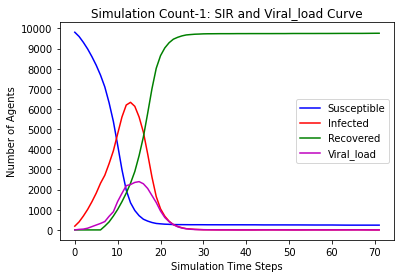

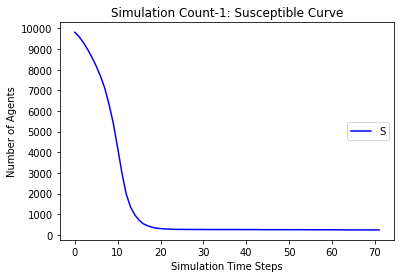

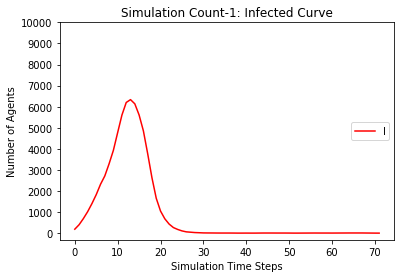

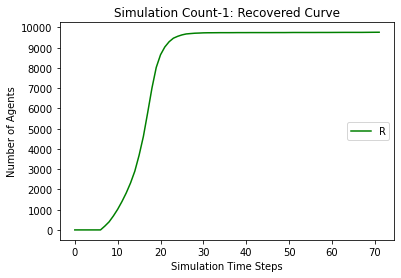

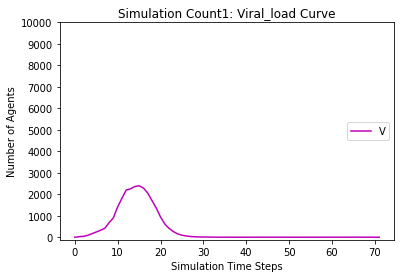

[9813, 9612, 9307, 8963, 8596, 8176, 7664, 6973, 6042, 4983, 4043, 3135, 2293, 1480, 902, 552, 373, 278, 218, 189, 169, 160, 157, 150, 149, 147, 146, 145, 145, 145, 145, 143, 141, 141, 141, 141, 141, 141, 141, 140, 139, 139, 139, 138, 138, 138, 138, 138, 138, 138, 137, 137, 137, 137, 137, 137, 137, 137]
[187, 388, 693, 1037, 1404, 1824, 2336, 2840, 3570, 4324, 4920, 5461, 5883, 6184, 6071, 5490, 4610, 3765, 2917, 2104, 1311, 742, 395, 223, 129, 71, 43, 24, 15, 12, 5, 6, 6, 5, 4, 4, 4, 4, 2, 1, 2, 2, 2, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 187, 388, 693, 1037, 1404, 1824, 2336, 3027, 3958, 5017, 5957, 6865, 7707, 8520, 9098, 9448, 9627, 9722, 9782, 9811, 9831, 9840, 9843, 9850, 9851, 9853, 9854, 9855, 9855, 9855, 9855, 9857, 9859, 9859, 9859, 9859, 9859, 9859, 9859, 9860, 9861, 9861, 9861, 9862, 9862, 9862, 9862, 9862, 9862, 9862, 9863]
[0.0, 25.0, 41.5, 74.75, 147.375, 241.6875, 343.84375, 519.921875, 728.9609375, 978.48046875, 1092.240234375, 1377.1201171

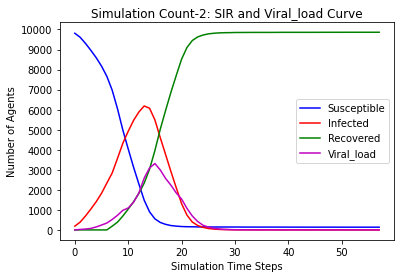

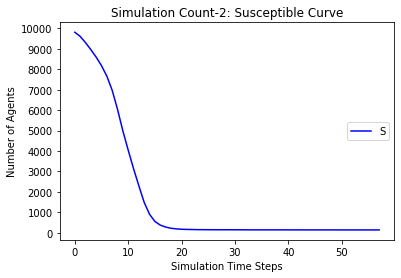

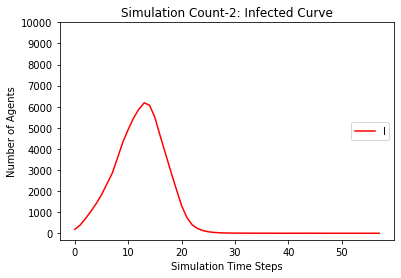

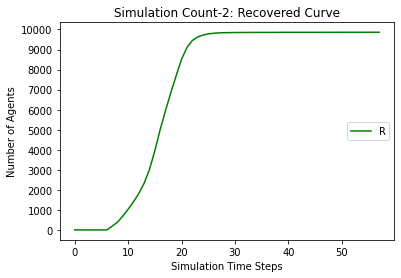

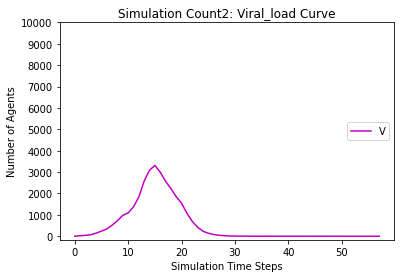

[9813, 9619, 9331, 8990, 8643, 8240, 7811, 7295, 6631, 5756, 4905, 4081, 3221, 2453, 1802, 1336, 993, 765, 577, 462, 385, 337, 308, 293, 280, 269, 259, 254, 250, 250, 249, 249, 249, 249, 249, 249, 249, 249]
[187, 381, 669, 1010, 1357, 1760, 2189, 2518, 2988, 3575, 4085, 4562, 5019, 5358, 5493, 5295, 4763, 4140, 3504, 2759, 2068, 1465, 1028, 700, 485, 308, 203, 131, 87, 58, 44, 31, 20, 10, 5, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 187, 381, 669, 1010, 1357, 1760, 2189, 2705, 3369, 4244, 5095, 5919, 6779, 7547, 8198, 8664, 9007, 9235, 9423, 9538, 9615, 9663, 9692, 9707, 9720, 9731, 9741, 9746, 9750, 9750, 9751]
[0.0, 27.0, 39.5, 60.75, 120.375, 204.1875, 279.09375, 353.546875, 548.7734375, 762.38671875, 746.193359375, 939.0966796875, 1248.54833984375, 1431.274169921875, 1653.6370849609375, 1785.8185424804688, 1803.9092712402344, 1836.9546356201172, 1765.4773178100586, 1489.7386589050293, 1184.8693294525146, 929.4346647262573, 682.7173323631287, 490.35866618156433, 344.17933309078217, 235.0896665

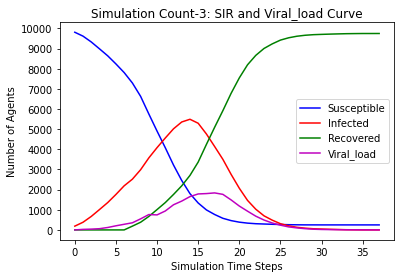

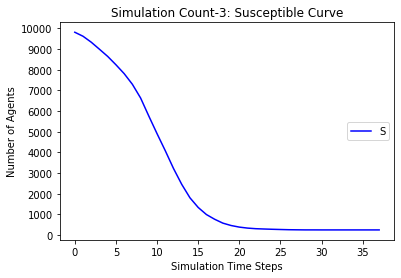

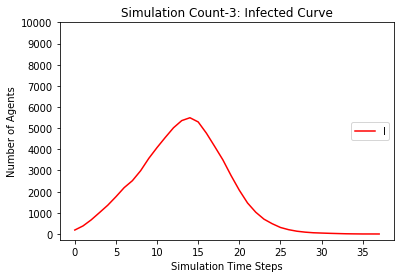

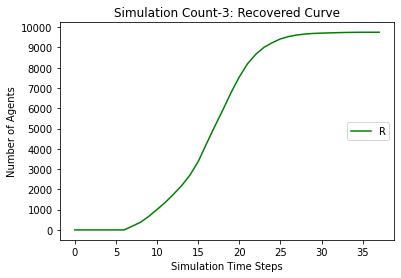

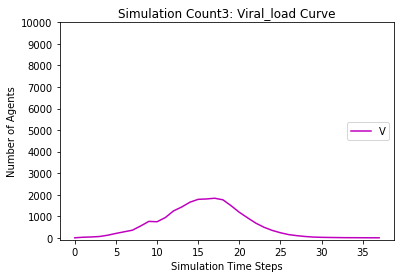

[9813, 9600, 9311, 8968, 8546, 8092, 7494, 6638, 5514, 4383, 3197, 2113, 1326, 648, 348, 193, 136, 118, 103, 94, 89, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88]
[187, 400, 689, 1032, 1454, 1908, 2506, 3175, 4086, 4928, 5771, 6433, 6766, 6846, 6290, 5321, 4247, 3079, 2010, 1232, 559, 260, 105, 48, 30, 15, 6, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 187, 400, 689, 1032, 1454, 1908, 2506, 3362, 4486, 5617, 6803, 7887, 8674, 9352, 9652, 9807, 9864, 9882, 9897, 9906, 9911, 9912, 9912, 9912, 9912, 9912]
[0.0, 25.0, 41.5, 87.75, 188.875, 269.4375, 359.71875, 694.859375, 1018.4296875, 1157.21484375, 1674.607421875, 2205.3037109375, 2599.65185546875, 3510.825927734375, 3634.4129638671875, 3682.2064819335938, 3235.103240966797, 2741.5516204833984, 2139.775810241699, 1515.8879051208496, 1003.9439525604248, 609.9719762802124, 353.9859881401062, 198.9929940700531, 106.49649703502655, 55.248248517513275, 29.624124258756638, 16.81206212937832, 9.40603106468916, 4.70301553234458, 2.35150776617229, 

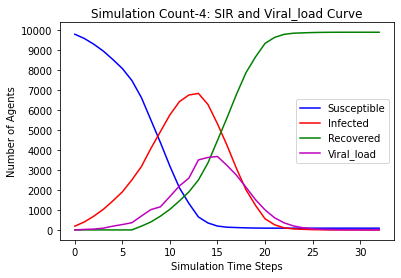

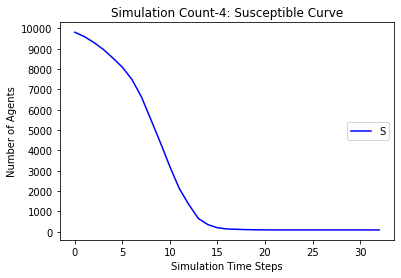

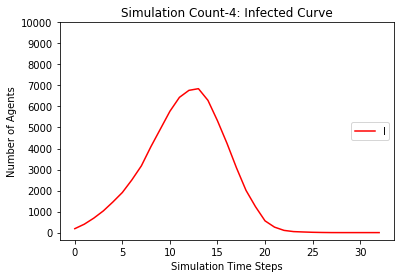

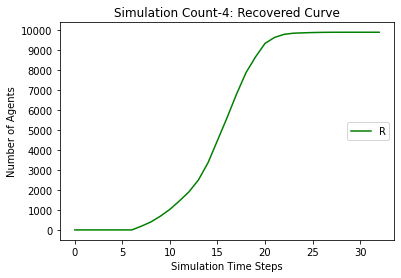

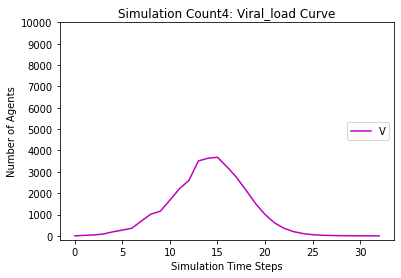

[9813, 9620, 9340, 8972, 8619, 8143, 7450, 6473, 5355, 4252, 3049, 1987, 1202, 761, 527, 397, 342, 305, 282, 272, 249, 227, 217, 210, 207, 206, 206, 203, 203, 203, 203, 203, 203, 203, 203, 203, 203]
[187, 380, 660, 1028, 1381, 1857, 2550, 3340, 4265, 5088, 5923, 6632, 6941, 6689, 5946, 4958, 3910, 2744, 1705, 930, 512, 300, 180, 132, 98, 76, 66, 46, 24, 14, 7, 4, 3, 3, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 187, 380, 660, 1028, 1381, 1857, 2550, 3527, 4645, 5748, 6951, 8013, 8798, 9239, 9473, 9603, 9658, 9695, 9718, 9728, 9751, 9773, 9783, 9790, 9793, 9794, 9794, 9797, 9797, 9797]
[0.0, 30.0, 42.0, 87.0, 127.5, 267.75, 504.875, 703.4375, 1010.71875, 1200.359375, 1947.1796875, 2470.58984375, 2907.294921875, 3090.6474609375, 3116.32373046875, 2951.161865234375, 2459.5809326171875, 2037.7904663085938, 1543.8952331542969, 1067.9476165771484, 719.9738082885742, 454.9869041442871, 274.49345207214355, 170.24672603607178, 101.12336301803589, 67.56168150901794, 42.78084075450897, 28.390420377254486, 20

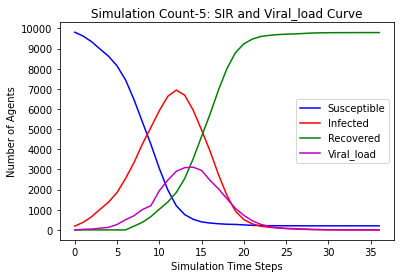

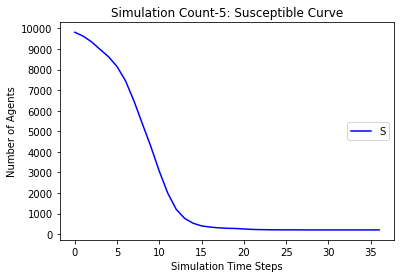

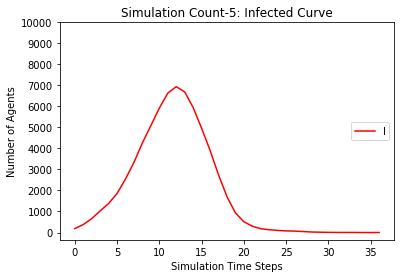

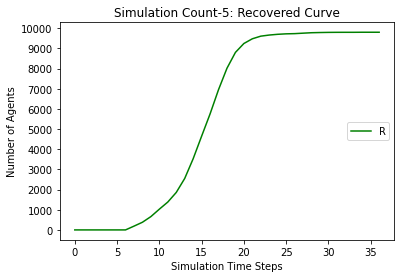

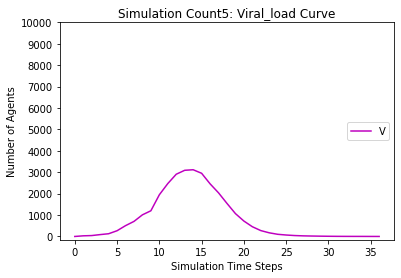

[9813, 9566, 9233, 8882, 8475, 7998, 7488, 6753, 5803, 4626, 3297, 2193, 1344, 735, 430, 271, 175, 133, 115, 86, 67, 59, 53, 52, 50, 50, 49, 49, 48, 48, 47, 47, 47, 47, 47, 47, 47, 47]
[187, 434, 767, 1118, 1525, 2002, 2512, 3060, 3763, 4607, 5585, 6282, 6654, 6753, 6323, 5532, 4451, 3164, 2078, 1258, 668, 371, 218, 123, 83, 65, 37, 18, 11, 5, 5, 3, 3, 2, 2, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 187, 434, 767, 1118, 1525, 2002, 2512, 3247, 4197, 5374, 6703, 7807, 8656, 9265, 9570, 9729, 9825, 9867, 9885, 9914, 9933, 9941, 9947, 9948, 9950, 9950, 9951, 9951, 9952, 9952, 9953]
[0.0, 33.0, 60.5, 85.25, 149.625, 281.8125, 358.90625, 599.453125, 950.7265625, 1278.36328125, 1980.181640625, 2370.0908203125, 2814.04541015625, 3467.022705078125, 3710.5113525390625, 3644.2556762695312, 3485.1278381347656, 3037.563919067383, 2463.7819595336914, 1820.8909797668457, 1236.4454898834229, 759.2227449417114, 463.6113724708557, 277.80568623542786, 165.90284311771393, 96.95142155885696, 59.47571077942848, 33.73

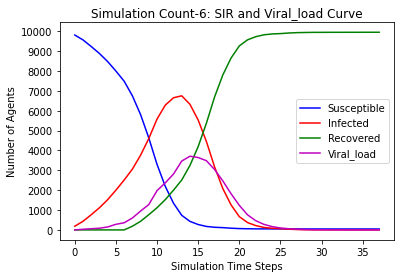

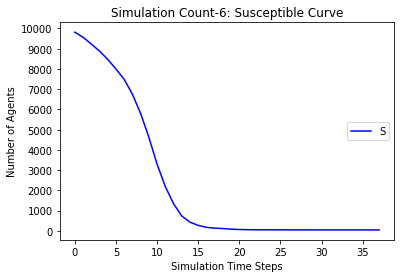

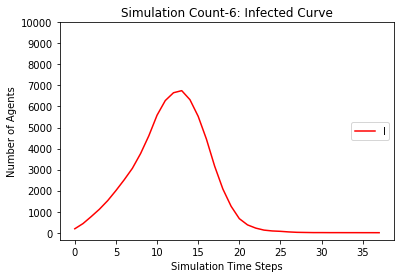

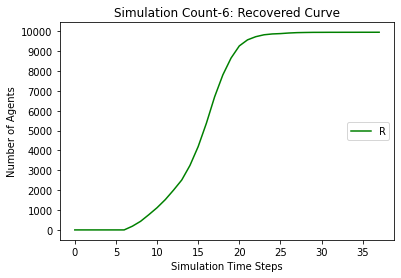

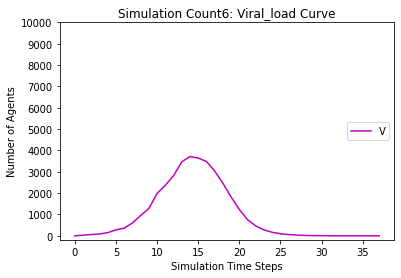

[9813, 9590, 9266, 8916, 8547, 8155, 7616, 6983, 6149, 5128, 4106, 3015, 1994, 1238, 811, 573, 399, 271, 214, 181, 166, 159, 154, 145, 141, 139, 139, 137, 137, 137, 137, 136, 136, 136, 136, 136, 136, 136, 136, 136]
[187, 410, 734, 1084, 1453, 1845, 2384, 2830, 3441, 4138, 4810, 5532, 6161, 6378, 6172, 5576, 4729, 3835, 2801, 1813, 1072, 652, 419, 254, 130, 75, 42, 29, 22, 17, 8, 5, 3, 3, 1, 1, 1, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 187, 410, 734, 1084, 1453, 1845, 2384, 3017, 3851, 4872, 5894, 6985, 8006, 8762, 9189, 9427, 9601, 9729, 9786, 9819, 9834, 9841, 9846, 9855, 9859, 9861, 9861, 9863, 9863, 9863, 9863, 9864, 9864]
[0.0, 28.0, 46.0, 98.0, 145.0, 197.5, 402.75, 499.375, 666.6875, 978.34375, 1210.171875, 1585.0859375, 2212.54296875, 2510.271484375, 2661.1357421875, 2639.56787109375, 2720.783935546875, 2615.3919677734375, 2311.6959838867188, 1787.8479919433594, 1288.9239959716797, 873.4619979858398, 562.7309989929199, 358.36549949645996, 216.18274974822998, 118.09137487411499, 67.04568

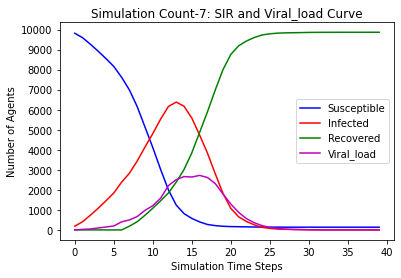

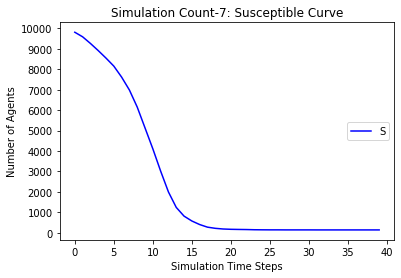

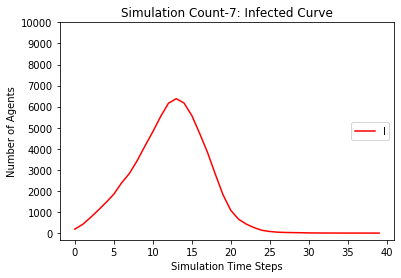

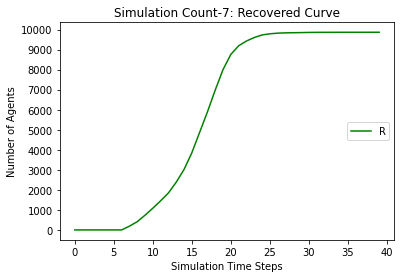

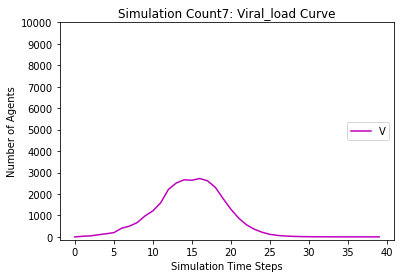

[9813, 9605, 9316, 8976, 8558, 8151, 7495, 6682, 5674, 4733, 3764, 2722, 1660, 884, 454, 251, 149, 106, 74, 66, 62, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61]
[187, 395, 684, 1024, 1442, 1849, 2505, 3131, 3931, 4583, 5212, 5836, 6491, 6611, 6228, 5423, 4584, 3658, 2648, 1594, 822, 393, 190, 88, 45, 13, 5, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 187, 395, 684, 1024, 1442, 1849, 2505, 3318, 4326, 5267, 6236, 7278, 8340, 9116, 9546, 9749, 9851, 9894, 9926, 9934, 9938, 9939, 9939, 9939, 9939, 9939]
[0.0, 28.0, 47.0, 82.5, 171.25, 220.625, 471.3125, 565.65625, 799.828125, 890.9140625, 1255.45703125, 1780.728515625, 2595.3642578125, 3108.68212890625, 3459.341064453125, 3412.6705322265625, 3178.3352661132812, 2850.1676330566406, 2442.0838165283203, 1873.0419082641602, 1326.52095413208, 849.26047706604, 510.63023853302, 291.31511926651, 157.657559633255, 80.8287798166275, 41.41438990831375, 20.707194954156876, 10.353597477078438, 5.176798738539219, 2.5883993692696095, 1.2941996846348047, 

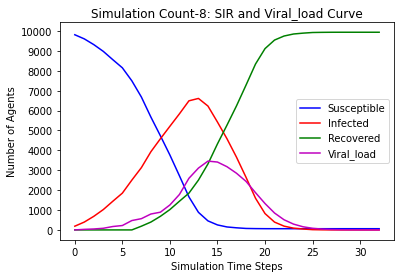

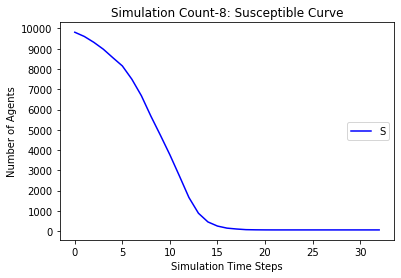

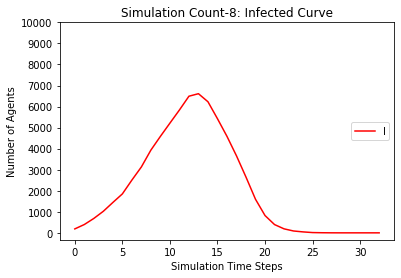

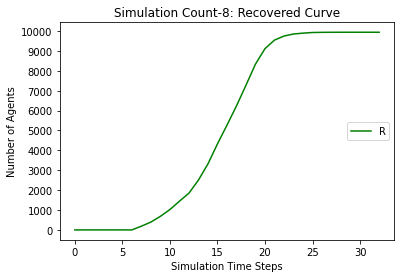

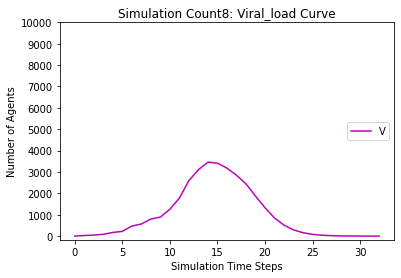

[9813, 9599, 9288, 8907, 8497, 8076, 7521, 6910, 6105, 5196, 4209, 3071, 2046, 1299, 836, 574, 415, 283, 178, 131, 113, 93, 83, 77, 75, 74, 74, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73]
[187, 401, 712, 1093, 1503, 1924, 2479, 2903, 3494, 4092, 4698, 5426, 6030, 6222, 6074, 5531, 4781, 3926, 2893, 1915, 1186, 743, 491, 338, 208, 104, 57, 40, 20, 10, 4, 2, 1, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 187, 401, 712, 1093, 1503, 1924, 2479, 3090, 3895, 4804, 5791, 6929, 7954, 8701, 9164, 9426, 9585, 9717, 9822, 9869, 9887, 9907, 9917, 9923, 9925, 9926, 9926, 9927, 9927, 9927]
[0.0, 24.0, 48.0, 108.0, 153.0, 230.5, 410.25, 448.125, 647.0625, 893.53125, 1162.765625, 1738.3828125, 2205.19140625, 2470.595703125, 2919.2978515625, 2942.64892578125, 2839.324462890625, 2641.6622314453125, 2508.8311157226562, 1965.4155578613281, 1432.707778930664, 1044.353889465332, 699.176944732666, 446.588472366333, 286.2942361831665, 172.14711809158325, 108.07355904579163, 62.03677952289581, 36.01838976144791, 19.00919488

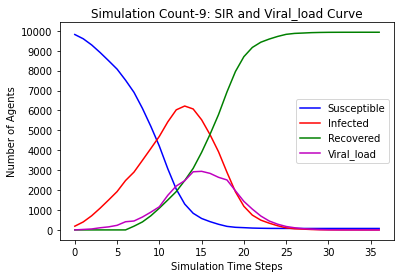

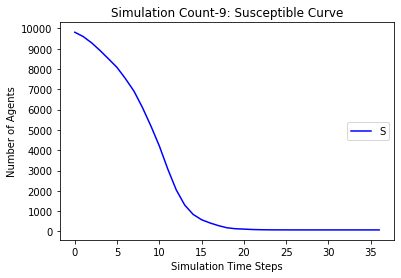

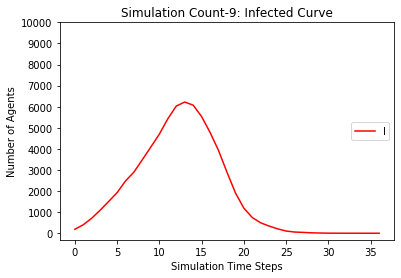

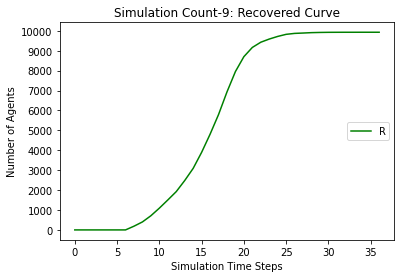

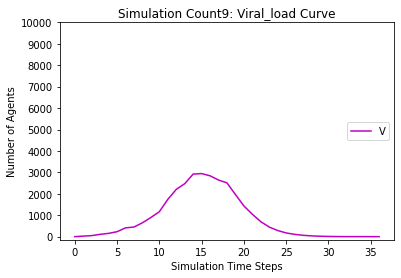

[9813, 9592, 9268, 8904, 8545, 8109, 7477, 6791, 6014, 4977, 3845, 2840, 2019, 1371, 944, 612, 426, 326, 249, 199, 179, 172, 166, 156, 151, 149, 149, 147, 147, 147, 147, 147, 147, 147, 147, 147]
[187, 408, 732, 1096, 1455, 1891, 2523, 3022, 3578, 4291, 5059, 5705, 6090, 6106, 5847, 5402, 4551, 3519, 2591, 1820, 1192, 772, 446, 270, 175, 100, 50, 32, 25, 19, 9, 4, 2, 2, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 187, 408, 732, 1096, 1455, 1891, 2523, 3209, 3986, 5023, 6155, 7160, 7981, 8629, 9056, 9388, 9574, 9674, 9751, 9801, 9821, 9828, 9834, 9844, 9849, 9851, 9851, 9853, 9853]
[0.0, 31.0, 49.5, 90.75, 199.375, 212.6875, 393.34375, 474.671875, 638.3359375, 991.16796875, 1330.583984375, 1566.2919921875, 1850.14599609375, 2146.072998046875, 2449.0364990234375, 2669.5182495117188, 2623.7591247558594, 2361.8795623779297, 2145.939781188965, 1690.9698905944824, 1235.4849452972412, 864.7424726486206, 603.3712363243103, 392.68561816215515, 237.34280908107758, 141.6714045405388, 82.8357022702694, 46.41785113

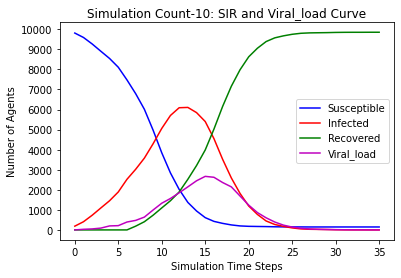

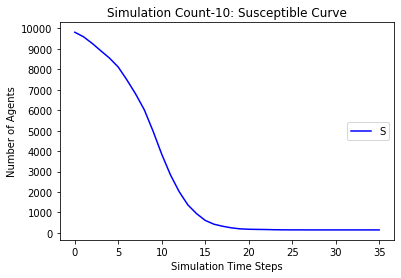

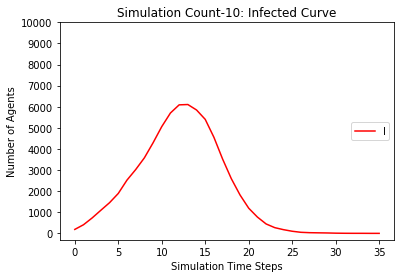

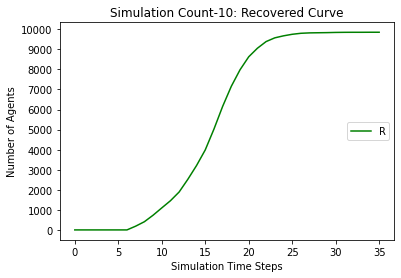

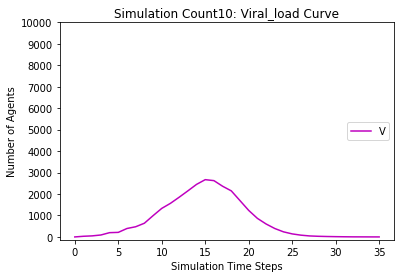

In [10]:
SS,II,RR,VV,TT = [[]],[[]],[[]],[[]],[[]]
for i in range(10):
  j=0
  Node_p=Node.copy()
  Node_n=Node.copy() 
  Agent_p=Agent.copy()
  Agent_n=Agent.copy()
  Sj,Ij,Rj,Vj = Count_SIR_Node(Node_n) 
  #print([Sj,Ij,Rj]) 
  S,I,R,V,T = [],[],[],[],[]
  S.append(Sj)
  I.append(Ij)
  R.append(Rj)
  V.append(Vj)
  T.append(j)

  while Ij > 0 or Vj >= 1 :
    Node_p,Node_n,Agent_p,Agent_n = random_walk(Graph,GraphN,Node_n,Agent_n,1,1)
    j+=1 
    Sj,Ij,Rj,Vj = Count_SIR_Node(Node_n) 
    S.append(Sj)
    I.append(Ij)
    R.append(Rj)
    V.append(Vj)
    T.append(j)
    
  print(S)
  print(I)
  print(R)
  print(V)
  SS.append(S)
  II.append(I)
  RR.append(R)
  VV.append(V)
  TT.append(T)
  print(SS)
  print(II)
  print(RR)
  print(VV)
  plt.plot(T, S, 'b', T, I, 'r', T, R, 'g',T, V, 'm')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': SIR and Viral_load Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Susceptible", "Infected", "Recovered", "Viral_load"),loc='center right')
  plt.show()  
  
  plt.plot(T, S, 'b')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': Susceptible Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Susceptible"),loc='center right')
  plt.show()

  plt.plot(T, I, 'r')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': Infected Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Infected"),loc='center right')
  plt.show()

  plt.plot(T, R, 'g')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': Recovered Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Recovered"),loc='center right')
  plt.show()  

  plt.plot(T, V, 'm')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count'+str(i+1)+': Viral_load Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Viral_load"),loc='center right')
  plt.show()  

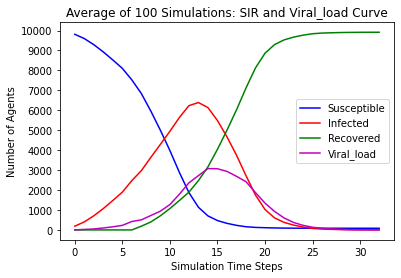

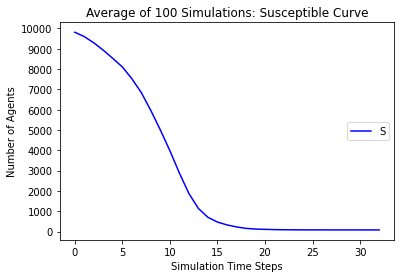

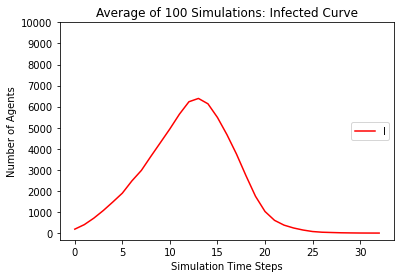

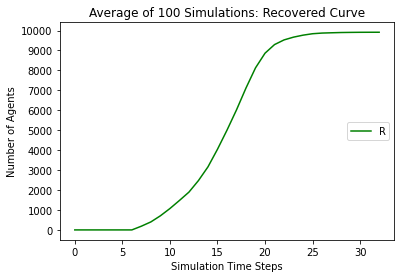

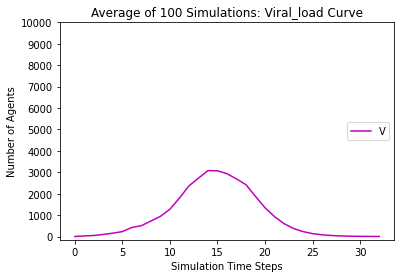

In [11]:
SC = SS[1]
IC = II[1]
RC = RR[1]
VT = VV[1]
TC = TT[1]
for i in range(2,10):
  SC = [mean(i) for i in zip(SC,SS[i])] 
  IC = [mean(i) for i in zip(IC,II[i])] 
  RC = [mean(i) for i in zip(RC,RR[i])] 
  VT = [mean(i) for i in zip(VT,VV[i])] 
  TC = [mean(i) for i in zip(TC,TT[i])] 

plt.plot(TC, SC, 'b', TC, IC, 'r', TC, RC, 'g', TC, VT, 'm')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: SIR and Viral_load Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))
plt.legend(("Susceptible", "Infected", "Recovered", "Viral_load"),loc='center right')
plt.show()  
  
plt.plot(TC, SC, 'b')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: Susceptible Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))
plt.legend(("Susceptible"),loc='center right')
plt.show()

plt.plot(TC, IC, 'r')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: Infected Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))

plt.legend(("Infected"),loc='center right')
plt.show()

plt.plot(TC, RC, 'g')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: Recovered Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))
plt.legend(("Recovered"),loc='center right')
plt.show()  

plt.plot(TC, VT, 'm')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: Viral_load Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))
plt.legend(("Viral_load"),loc='center right')
plt.show() 



  
